In [413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [414]:
print("Numpy:", np.__version__)
print("Pandas:", pd.__version__)

pd.options.mode.chained_assignment = None

Numpy: 1.19.4
Pandas: 1.1.5


In [415]:
# Pandas Settings
pd.set_option("max_rows", 30)
pd.set_option("precision", 4)

# Treat None, Null, INF, -INF as NA
pd.options.mode.use_inf_as_na = True

plt.rcParams["figure.figsize"] = [10, 10]

In [416]:
df = pd.read_csv("ISEAR.csv", names=["emotion", "text"])
df.head()

,emotion,text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


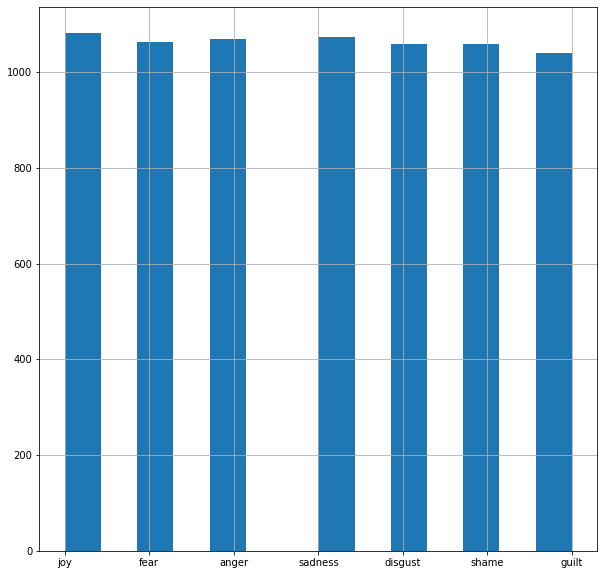

In [417]:
df["emotion"].hist(bins=14)

In [418]:
df.describe()

,emotion,text
count,7446,7446
unique,7,7379
top,joy,When my grandfather died.
freq,1082,8


In [419]:
df = df.loc[(df["emotion"] != "disgust") & (df["emotion"] != "guilt")]
df.describe()

,emotion,text
count,5347,5347
unique,5,5289
top,joy,When my grandfather died.
freq,1082,8


In [420]:
df.reset_index(drop=True)
df

,emotion,text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
5,shame,When I realized that I was directing the feeli...
...,...,...
7439,joy,When I received the result slip of the higher ...
7440,fear,"One camping night, I listened to the ghost sto..."
7441,anger,Last week I had planned to play tennis and had...
7442,sadness,When I was ill and had to stay at the hospital...


In [421]:
df["emotion"].unique()

array(['joy', 'fear', 'anger', 'sadness', 'shame'], dtype=object)

In [422]:
df.head()

,emotion,text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
5,shame,When I realized that I was directing the feeli...


In [423]:
emotion_dict = {"anger": 1, "fear": 2, "joy": 3, "sadness": 4, "shame": 5}

In [424]:
df["emotion"] = df["emotion"].map(emotion_dict)

In [425]:
df["emotion"].unique()

array([3, 2, 1, 4, 5])

In [426]:
df.head()

,emotion,text
0,3,On days when I feel close to my partner and ot...
1,2,Every time I imagine that someone I love or I ...
2,1,When I had been obviously unjustly treated and...
3,4,When I think about the short time that we live...
5,5,When I realized that I was directing the feeli...


In [427]:
import nltk

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [428]:
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


def text_processor(text):
    # clean the words, remove symbols special chars
    text = text.lower()

    text = re.sub("n't", " not", text)
    text = re.sub("'re", " are", text)
    text = re.sub("'s", " is", text)
    text = re.sub("'ll", " will", text)
    text = re.sub("'ve", " have", text)
    text = re.sub("'m", " am", text)

    # Words Selection
    text = re.sub("[^A-Za-z]+", " ", text)

    # Word Tokenisation
    word_tokenized = word_tokenize(text)

    # Stop words removal
    stop_words = stopwords.words("english")

    stopwords_free = [word for word in word_tokenized if word not in stop_words]

    return stopwords_free

In [429]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


def porter_stemmer(tokens):
    return [stemmer.stem(token) for token in tokens]


def wordnet_lemmatizer(tokens):
    return [lemmatizer.lemmatize(token, pos="v") for token in tokens]

In [430]:
# Select sentences with more than 20 characters
df = df.loc[new_df["text"].str.len() > 0]
df.reset_index(drop=True, inplace=True)

In [431]:
lemma = []

for instance in df["text"].tolist():
    tokens = text_processor(instance)
    lemma.append(wordnet_lemmatizer(tokens))

print(lemma)
print(len(lemma))

[['days', 'feel', 'close', 'partner', 'friends', 'feel', 'peace', 'also', 'experience', 'close', 'contact', 'people', 'regard', 'greatly'], ['every', 'time', 'imagine', 'someone', 'love', 'could', 'contact', 'serious', 'illness', 'even', 'death'], ['obviously', 'unjustly', 'treat', 'possibility', 'elucidate'], ['think', 'short', 'time', 'live', 'relate', 'periods', 'life', 'think', 'use', 'short', 'time'], ['realize', 'direct', 'feel', 'discontent', 'partner', 'way', 'try', 'put', 'blame', 'instead', 'sort', 'feeliings'], ['girlfriend', 'take', 'exam', 'go', 'parent', 'place'], ['first', 'time', 'realize', 'mean', 'death'], ['car', 'overtake', 'another', 'force', 'drive', 'road'], ['recently', 'think', 'hard', 'work', 'take', 'study', 'one', 'want', 'try', 'something', 'else', 'read', 'theoretical', 'book', 'english', 'understand'], ['tire', 'unmotivated', 'shout', 'girlfriend', 'bring', 'negative', 'side', 'character', 'actually', 'important'], ['pass', 'examination', 'think', 'well']

In [432]:
df["lemmatised_tokens"] = lemma

In [433]:
df

,emotion,text,lemmatised_tokens
0,3,On days when I feel close to my partner and ot...,"[days, feel, close, partner, friends, feel, pe..."
1,2,Every time I imagine that someone I love or I ...,"[every, time, imagine, someone, love, could, c..."
2,1,When I had been obviously unjustly treated and...,"[obviously, unjustly, treat, possibility, eluc..."
3,4,When I think about the short time that we live...,"[think, short, time, live, relate, periods, li..."
4,5,When I realized that I was directing the feeli...,"[realize, direct, feel, discontent, partner, w..."
...,...,...,...
5342,3,When I received the result slip of the higher ...,"[receive, result, slip, higher, level, examina..."
5343,2,"One camping night, I listened to the ghost sto...","[one, camp, night, listen, ghost, stories, tel..."
5344,1,Last week I had planned to play tennis and had...,"[last, week, plan, play, tennis, book, tennis,..."
5345,4,When I was ill and had to stay at the hospital...,"[ill, stay, hospital, period, time]"


In [469]:
corpus = df["lemmatised_tokens"].apply(" ".join).tolist()
target = df["emotion"]

In [470]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

tfidf = TfidfVectorizer()
mnb = MultinomialNB()

cal_accuracy = []

for split_ratio in [0.2]:
    # Train Test Split
    x_train, x_test, y_train, y_test = train_test_split(
        corpus, target, test_size=split_ratio, random_state=53
    )

    # Transform X_train
    x_traintv = tfidf.fit_transform(x_train).toarray()

    # Model Fitting
    mnb.fit(x_traintv, y_train)

    # Transform X_test
    x_testtv = tfidf.transform(x_test)

    # Model Prediction
    pred = mnb.predict(x_testtv)
    actual = np.array(y_test)

    cal_accuracy.append(accuracy_score(actual, pred))

print(cal_accuracy)

[0.6822429906542056]


In [471]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

x_train, x_test, y_train, y_test = train_test_split(
    corpus, target, test_size=0.2, random_state=53
)

x_traintv = tfidf.fit_transform(x_train).toarray()

params_grid = {"alpha": np.linspace(0, 1, 5)}

cv = GridSearchCV(estimator=MultinomialNB(), param_grid=params_grid, scoring="accuracy")

cv.fit(x_traintv, y_train)

best_score = cv.best_score_

best_params = cv.best_params_ 

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [472]:
print(best_score)
print(best_params)

0.6399308629830027
{'alpha': 1.0}


In [478]:
cv.cv_results_

{'mean_fit_time': array([0.11209812, 0.11377645, 0.10951986, 0.11015329, 0.11145139]),
 'mean_score_time': array([0.01220436, 0.01113229, 0.01049376, 0.01085696, 0.01064196]),
 'mean_test_score': array([0.54336667, 0.63151418, 0.63502104, 0.63619091, 0.63993086]),
 'param_alpha': masked_array(data=[0.0, 0.25, 0.5, 0.75, 1.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.0},
  {'alpha': 0.25},
  {'alpha': 0.5},
  {'alpha': 0.75},
  {'alpha': 1.0}],
 'rank_test_score': array([5, 4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.56775701, 0.64602804, 0.64953271, 0.64836449, 0.65303738]),
 'split1_test_score': array([0.53971963, 0.63084112, 0.63551402, 0.63551402, 0.64252336]),
 'split2_test_score': array([0.51812865, 0.61637427, 0.62222222, 0.61754386, 0.61520468]),
 'split3_test_score': array([0.54502924, 0.6374269 , 0.63859649, 0.64327485, 0.64912281]),
 'split4_test_score': array([0.54619883,

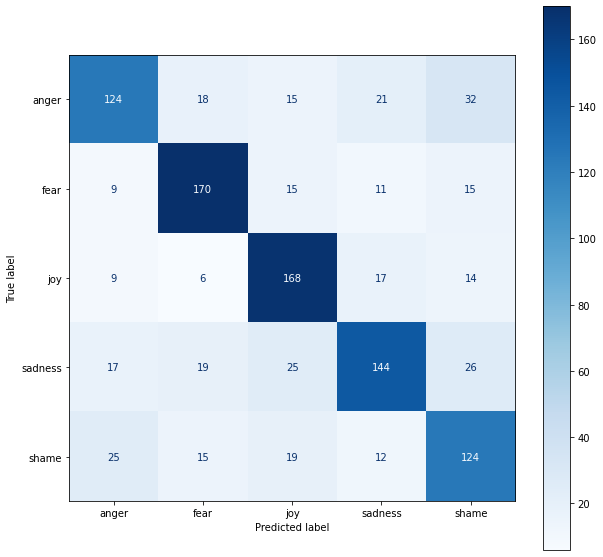

In [491]:
from sklearn.metrics import plot_confusion_matrix
classes = [key for key, value in emotion_dict.items()]
disp = plot_confusion_matrix(mnb,x_testtv,y_test, display_labels=classes, cmap='Blues', values_format='d')
plt.show()